In [ ]:
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy.optimize import curve_fit
from tabulate import tabulate

In [ ]:
#This function returns the amount of wine at the kth cup at time t given the capacity. T is assumed to be 1. This function is obtained using the solution from assgn-1 and will
# be used to generate data for the black box model
def x_k(k,t,capacity):
  sum=0
  if t>1:
    t=1
  for i in range(k):
    sum+=(1.0/math.factorial(i))*(t**i)
  sum=sum*math.exp(-t)
  ans=capacity*(1-sum)
  return ans


In [ ]:
t=np.random.uniform(low=0.0,high=1.0,size=1000)

In [ ]:
true_x1=[] # These arrays shall store the actual amount of wine at cups 1,2,3,4,5 at the above times
true_x2=[]
true_x3=[]
true_x4=[]
true_x5=[]

for i in range(1000):
  true_x1.append(x_k(1,t[i],1.0))
  true_x2.append(x_k(2,t[i],1.0))
  true_x3.append(x_k(3,t[i],1.0))
  true_x4.append(x_k(4,t[i],1.0))
  true_x5.append(x_k(5,t[i],1.0))

true_x1=np.array(true_x1)
true_x2=np.array(true_x2)
true_x3=np.array(true_x3)
true_x4=np.array(true_x4)
true_x5=np.array(true_x5)

In [ ]:
def objective(t,a,b,c,d):
  return a+b*(t)+c*(t**2)+d*(t**3)

In [ ]:
parameters_1,_=curve_fit(objective,t[:800],true_x1[:800]) #only 80% used for training
parameters_2,_=curve_fit(objective,t[:800],true_x2[:800])
parameters_3,_=curve_fit(objective,t[:800],true_x3[:800])
parameters_4,_=curve_fit(objective,t[:800],true_x4[:800])
parameters_5,_=curve_fit(objective,t[:800],true_x5[:800])

In [ ]:
parameters_5

array([-7.00042329e-05,  1.36407966e-03, -6.01701187e-03,  8.33066253e-03])

In [ ]:
predictions_x1=[] # remaining 20% used for testing
error=0.0
for i in range(800,1000):
  predictions_x1.append(objective(t[i],parameters_1[0],parameters_1[1],parameters_1[2],parameters_1[3]))
predictions_x1=np.array(predictions_x1)
print(np.mean(np.abs(predictions_x1-true_x1[800:])))


0.00010707290521724408


In [ ]:
predictions_x2=[]
error=0.0
for i in range(800,1000):
  predictions_x2.append(objective(t[i],parameters_2[0],parameters_2[1],parameters_2[2],parameters_2[3]))
predictions_x2=np.array(predictions_x2)
print(np.mean(np.abs(predictions_x2-true_x2[800:])))

0.00026981658720415025


In [ ]:
predictions_x3=[]
error=0.0
for i in range(800,1000):
  predictions_x3.append(objective(t[i],parameters_3[0],parameters_3[1],parameters_3[2],parameters_3[3]))
predictions_x3=np.array(predictions_x3)
print(np.mean(np.abs(predictions_x3-true_x3[800:])))

0.0001807712160459786


In [ ]:
predictions_x4=[]
error=0.0
for i in range(800,1000):
  predictions_x4.append(objective(t[i],parameters_4[0],parameters_4[1],parameters_4[2],parameters_4[3]))
predictions_x4=np.array(predictions_x4)
print(np.mean(np.abs(predictions_x4-true_x4[800:])))

1.1798931194920716e-05


In [ ]:
predictions_x5=[]
error=0.0
for i in range(800,1000):
  predictions_x5.append(objective(t[i],parameters_5[0],parameters_5[1],parameters_5[2],parameters_5[3]))
predictions_x5=np.array(predictions_x5)
print(np.mean(np.abs(predictions_x5-true_x5[800:])))

1.8117944647648166e-05


In [ ]:
# Table comparing predicted values with true values for 20 data points for cup 5
data=[]
for i in range(20):
  data.append([t[980+i],true_x5[980+i],predictions_x5[180+i]])
head=['Time (t)','True amount of wine in cup 5','Predicted amount of wine in cup 5']
print(tabulate(data, headers=head, tablefmt="grid"))

+------------+--------------------------------+-------------------------------------+
|   Time (t) |   True amount of wine in cup 5 |   Predicted amount of wine in cup 5 |
+============+================================+=====================================+
|  0.791587  |                    0.00134787  |                         0.00137161  |
+------------+--------------------------------+-------------------------------------+
|  0.0138564 |                    4.20797e-12 |                        -5.22361e-05 |
+------------+--------------------------------+-------------------------------------+
|  0.884947  |                    0.0021811   |                         0.00219841  |
+------------+--------------------------------+-------------------------------------+
|  0.886329  |                    0.00219572  |                         0.00221266  |
+------------+--------------------------------+-------------------------------------+
|  0.280879  |                    1.15373e-05 |       

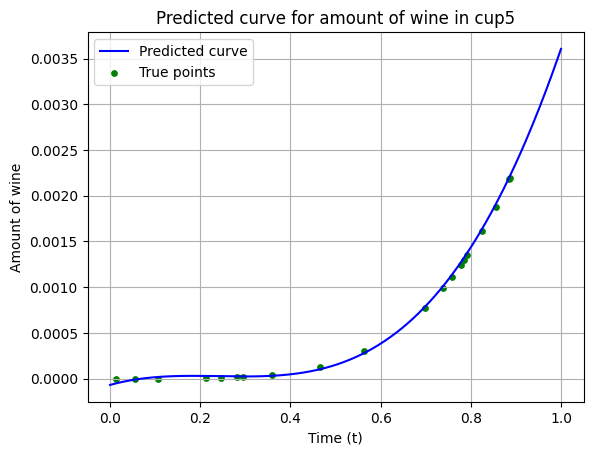

In [ ]:
# code to generate plot of the predicted objective function
y_pred=[]
for i in range(10000):
  y_pred.append(objective(i/10000.0,parameters_5[0],parameters_5[1],parameters_5[2],parameters_5[3]))

data=np.array(data)# using the data table defined in the previous cell to compare the predicted curve and true points
plt.plot(np.array(list(range(10000)))/10000.0,y_pred,c='b',label='Predicted curve')
plt.scatter(data[:,0],data[:,1],c='green',s=15,label='True points')
plt.title('Predicted curve for amount of wine in cup5')
plt.ylabel('Amount of wine')
plt.xlabel('Time (t)')
plt.grid('on')
plt.legend()
